In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class G:
  def __init__(self, r=0, i=0):
    self.re = r
    self.im = i

  def __add__(self, x):
    return G(self.re + x.re, self.im + x.im)

  def __sub__(self, x):
    return G(self.re - x.re, self.im - x.im)

  def __mul__(self, x):
    a = self.re
    b = self.im
    c = x.re
    d = x.im
    return G(a*c - b*d, a*d + b*c + b*d)

  def __str__(self):
    return str(self.re) + " + " + str(self.im) + "ω"

  def __repr__(self):
    return str(self)

  def coords(self):
    return self.re, self.im

  def norm(self):
    a = self.re
    b = self.im
    return a**2 + a*b + b**2

  def conjugate(self):
    return G(self.re + self.im, -self.im)

  def __truediv__(self, x):
    if x.norm() == 0:
      raise Exception("Division by zero")
    int_num = self * x.conjugate() # numerator of the complex quotient a / b
    a, b = int_num.coords()
    int_den = x.norm() # denominator of the complex quotient a / b
    a, b = a / int_den, b / int_den # components of the complex quotient a / b

    return G(a, b)

  def real(self):
    return self.re

  def imaginary(self):
    return self.im


In [3]:
def embed(x, y):
  return x + 0.5 * y, (np.sqrt(3) / 2) * y

In [4]:
def full_embed(w):
    x, y = w.real(), w.imaginary()
    x, y = embed(x, y)
    return complex(x, y)

In [5]:
def complex_div(a, b, c, d):
    x = (a*c + b*d) / (c**2 + d**2)
    y = (b*c - a*d) / (d**2 + d**2)

    return x, y

In [6]:
def gauss_gcd_step(a, b):
  x, y = (a / b).coords()
  
  # u = x - (1 / math.sqrt(3)) * y
  # v = (2 / math.sqrt(3)) * y

  u, v = x, y

  qx, qy = math.floor(u + 0.5), math.floor(v + 0.5)

  q = G(qx, qy)

  r = a - q * b

  return q, r

In [7]:
# def gauss_gcd(a, b):
#   q, r = gauss_gcd_step(a, b)
#   steps = 1
#   while abs(r.norm()) > 0:
#     a, b = b, r
#     q, r = gauss_gcd_step(a, b)
#     steps += 1
#   return b, steps

In [8]:
def gauss_gcd(a, b):
  q, r = gauss_gcd_step(a, b)
  q1 = r
  steps = 1
  while r.norm() > 0:
    a, b = b, r
    q, r = gauss_gcd_step(a, b)
    steps += 1
    if steps == 2:
      q1 = r
  return b, steps, q1

In [9]:
a = G(37, 41)
# 73 and 41
# 119 120

grid_size = 200

dividends = [G(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [10]:
steps = []
quots = []
for b in dividends:
  if b.norm() == 0:
    steps.append(1)
    quots.append(0)
    continue
  _, s, q = gauss_gcd(a, b)
  steps.append(s)
  quots.append(q.norm())

In [11]:
xhex, yhex = [], []

for z in dividends:
    x, y = z.coords()
    X, Y = embed(x, y)
    xhex.append(X)
    yhex.append(Y)

In [12]:
# assocs = [a, a * G(-1, 0), a * G(0,1), a * G(0,-1), a * G(-1, 1), a * G(1, -1)]
assocs = [a]

In [13]:
# d2 = [G(x, y) for x in range(-10, 10) for y in range(-10, 10)]

# for b in d2:
#     if b.norm() != 0:
#         assocs.append(a / b)

In [14]:
# d2 = [gg.GG(x, y) for x in range(-5, 5) for y in range(-5, 5)]
# d2 = [G(1, 0)]

# for b in d2:
#     if b.norm() != 0:
#         for i in [3, 5]:
#           assocs.append(a / G(i, 0))
#           assocs.append(a / G(0, i))
#           assocs.append(a / G(-i, 0))
#           assocs.append(a / G(0, -i))

In [15]:
print((a * G(-1, 1) - a * G(1, -1)).norm())

18268


In [16]:
def circ(c, r):
    e, f = a.real(), a.imaginary()
    e, f = embed(e, f)
    r = math.sqrt(e**2 + f**2)
    t = np.linspace(0, 2*np.pi, 1000)
    x = e + r * np.cos(t)
    y = f + r * np.sin(t)
    plt.plot(x, y, color="purple")

In [17]:
# def circ_lines(k=0):
#     K = k + 0.5
#     c, d = a.real(), a.imaginary()
#     # re_x1 = (K1*c+d*t)/(K1**2+t**2)
#     # re_y1 = (K1*d-c*t)/(K1**2+t**2)
#     # re_x2 = (K2*c+d*t)/(K2**2+t**2)
#     # re_y2 = (K2*d-c*t)/(K2**2+t**2)

#     t = np.linspace(0, 2*np.pi, 1000)

#     re_x = c + c*np.cos(t) - d*np.sin(t)
#     re_y = d + c*np.sin(t) + d*np.cos(t)

#     plt.plot(re_x, re_y, color='purple')

#     # im_x = (c*(np.cos(t))-d*(-1+np.sin(t))) / (2*K)
#     # im_y = (c*(-1+np.sin(t))+d*(np.cos(t))) / (2*K)
    
#     # plt.plot(im_x, im_y, color='orange')
    
#     # im_x = (t*c+d*K)/(K**2+t**2)
#     # im_y = (t*d-c*K)/(K**2+t**2)

#     # x = np.concat([re_x, im_x], axis=0)
#     # y = np.concat([re_y, im_y], axis=0)

#     # x = im_x
#     # y = im_y

#     # return np.stack([x, y],axis=1)

In [18]:
def circ_lines(m1, m2, c1, c2):
    c, d = a.real(), a.imaginary()
    c, d = embed(c, d)

    x0 = m2 / (2 * (c1*m2 + c2*m1))
    y0 = m1 / (2 * (c1*m2 + c2*m1))
    r = math.sqrt(x0**2 + y0**2)

    t = np.linspace(0, 2*np.pi, 1000)

    re_x = c * (x0 + r*np.cos(t)) - d * (y0 + r*np.sin(t))
    re_y = c * (y0 + r*np.sin(t)) + d * (x0 + r*np.cos(t))

    plt.plot(re_x, re_y, color='purple')


In [19]:
def circ_lines(m1, m2, c1, c2):
    ax, ay = embed(a.real(), a.imaginary())
    p = complex(ax, ay)
    c = complex(c1, c2)
    m = complex(m1, m2)

    t = np.linspace(-100, 100, 10000)

    w = p / (m * t + c)

    re_x = w.real
    re_y = w.imag

    plt.plot(re_x, re_y, color='purple')

In [20]:
def circ_lines2(m1, m2, c1, c2, q=complex(1,1)):
    ax, ay = embed(a.real(), a.imaginary())
    p = complex(ax, ay)
    c = complex(c1, c2)
    m = complex(m1, m2)

    t = np.linspace(-100, 100, 10000)

    line = m*t + c

    w = p * line / (q * line + 1)

    re_x = w.real
    re_y = w.imag

    plt.plot(re_x, re_y, color='purple')

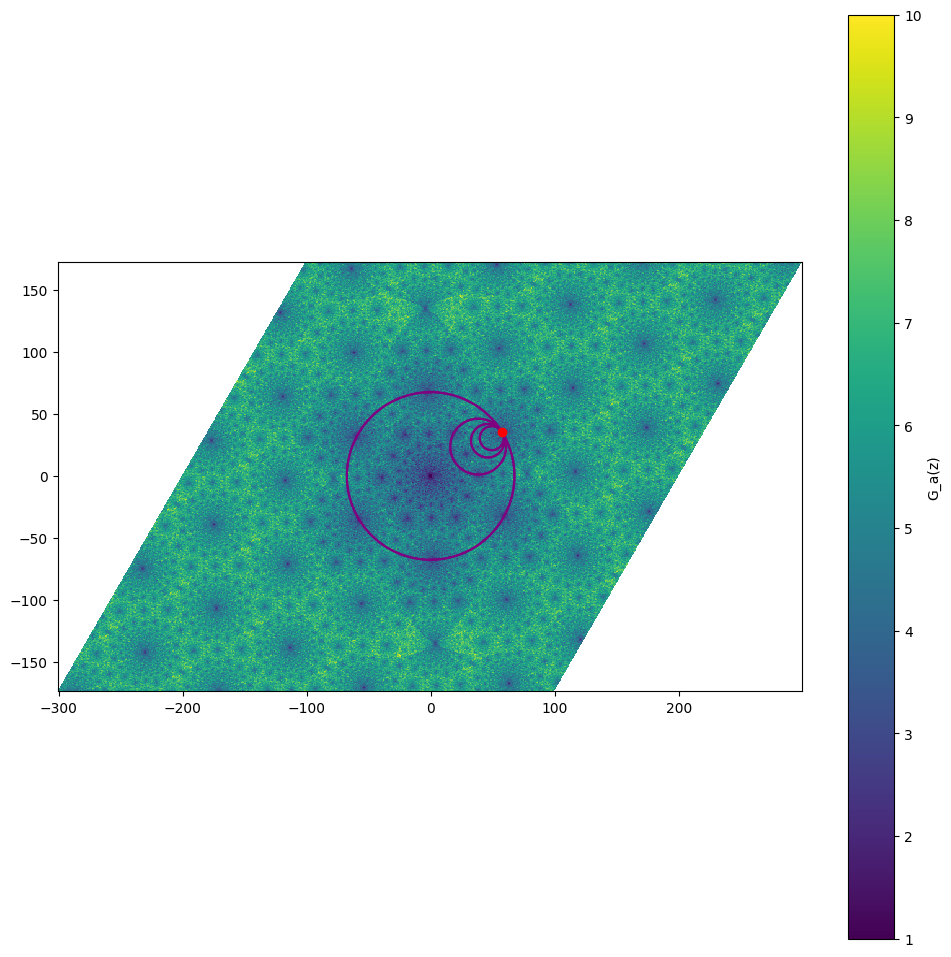

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')
X, Y = embed(X, Y)

Z = np.array(steps).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

plt.gca().set_aspect('equal')

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

# plt.plot(pts[:,0], pts[:,1], color='orange')

# circ_lines(0, 1, 0.5, 0)
# circ_lines(0, 1, -0.5, 0)
# circ_lines(1, -1/math.sqrt(3), 0, 1/math.sqrt(3))
# circ_lines(-1, 1/math.sqrt(3), 0, -1/math.sqrt(3))
# circ_lines(1, 1/math.sqrt(3), 0, 1/math.sqrt(3))
# circ_lines(-1, -1/math.sqrt(3), 0, -1/math.sqrt(3))

for k in [-1, 0, 1, 2]:
    for i in [1]:
        q1 = G(i, 0)
        # q2 = G(0, i)
        q2 = G(i, 0)
        q1, q2 = full_embed(q1), full_embed(q2)
        circ_lines2(0, 1, k+0.5, 0, q1)
        circ_lines2(0, 1, k+0.5, 0, q2)



plt.gca().set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("G_a(z)")

plt.show()

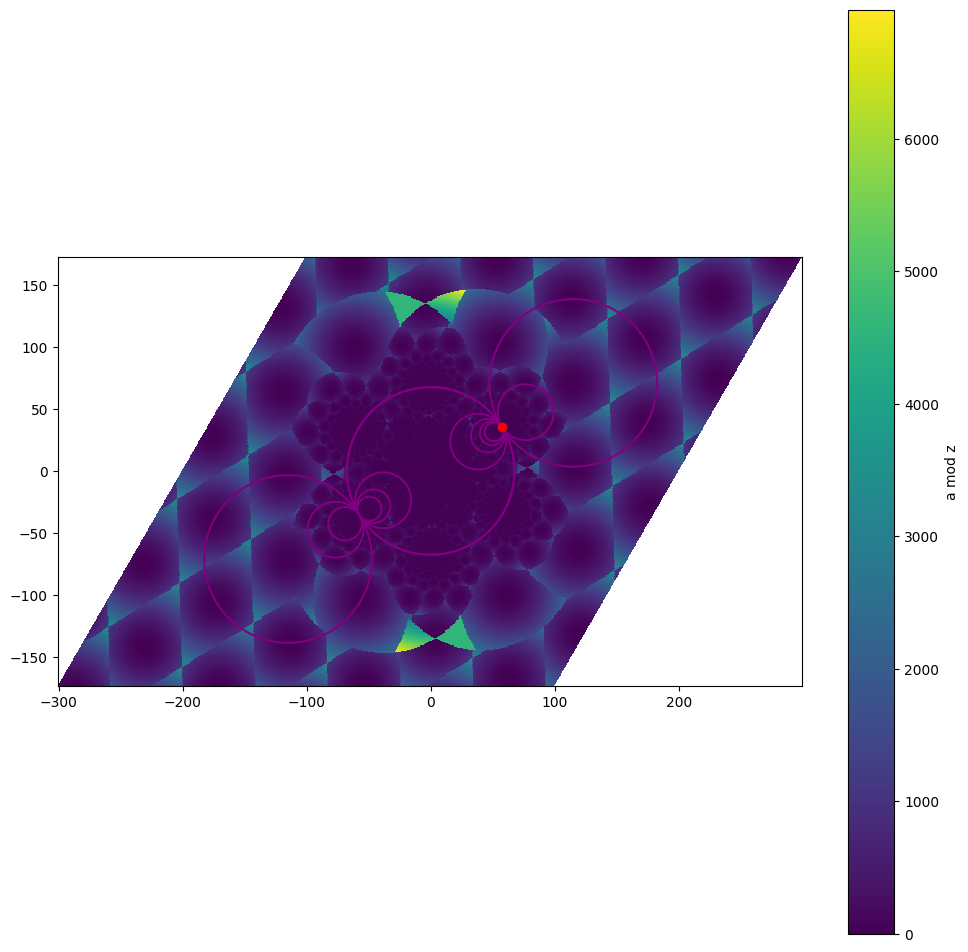

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')

X, Y = embed(X, Y)

Z = np.array(quots).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

# pts = circ(fine, a / G(2, 0), np.sqrt((a / G(2, 0)).norm()))
# plt.plot(pts[:,0], pts[:,1], color='orange')

# plt.plot(pts[:,0], pts[:,1], color='orange')

# circ_lines(0, 1, 0.5, 0)
# circ_lines(0, 1, -0.5, 0)
# circ_lines(1, -1/math.sqrt(3), 0, 1/math.sqrt(3))
# circ_lines(-1, 1/math.sqrt(3), 0, -1/math.sqrt(3))
# circ_lines(1, 1/math.sqrt(3), 0, 1/math.sqrt(3))
# circ_lines(-1, -1/math.sqrt(3), 0, -1/math.sqrt(3))

for k in [-3,-2,-1,0,1, 2, 3]:
    for i in [1]:
        q1 = G(i, 0)
        q2 = G(-i, 0)
        q1, q2 = full_embed(q1), full_embed(q2)
        circ_lines2(0, 1, k+0.5, 0, q1)
        circ_lines2(0, 1, k+0.5, 0, q2)

ax.set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("a mod z")

plt.show()